## Missing Values - Feature Enginnering - Day-1

#### Lifecycle of a Data Science Projects

1) Data Collection Strategy---from company side,3rd party APi's,Surveys

2) Feature Engineering---Handling Missing Values




#### Why are their Missing values?? Survey--Depression Survey

            They hesitate to put down the information

            Survey informations are not that valid

            Men--salary

            Women---age

            People may have died----NAN




###### Data Science Projects---Dataset should be collected from multiple sources


### What are the different types of Missing Data?
##### 1) Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

##### 2) Missing Data Not At Random(MNAR): Systematic missing Values
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

##### 3) Missing at random:
The values are just randomly missed due to any reason

eg:-1) men hide their salary            2) women hide their age

In [2]:
import pandas as pd

In [3]:
df= pd.read_csv("C:\\Users\\Jayesh\\Desktop\\titanic_train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
## Here Age and Cabin are related to each other and therefore they are not MCAR.
## Rather Embarked is MCAR as the missing values have no relation with any values and are completely randomly missed

In [8]:
df["Embarked"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [9]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
import numpy as np
df["Cabin_null"]=np.where(df["Cabin"].isnull(),1,0) ## Replacing nan values with 1 and rest with zero

## Find the percentage of null values
df["Cabin_null"].mean()         ##Therefore 77% of data is missing

0.7710437710437711

In [11]:
import numpy as np
df["Age_null"]=np.where(df["Age"].isnull(),1,0)

## Find the percentage of null values
df["Age_null"].mean()    ##Therefore 19% of data is missing

0.19865319865319866

In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null',
       'Age_null'],
      dtype='object')

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null,Age_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


In [15]:
df.groupby(["Survived"],["Cabin_null"].mean())

AttributeError: 'list' object has no attribute 'mean'

In [17]:
df.groupby(["Survived"])["Cabin_null"].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

In [20]:
df.groupby(["Survived"])["Cabin_null"].groups()

TypeError: 'dict' object is not callable

In [21]:
df.groupby("Survived","Cabin_null").mean()

ValueError: No axis named Cabin_null for object type <class 'pandas.core.frame.DataFrame'>

In [23]:
df.groupby(["Survived"])["Cabin_null"].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

In [24]:
##-------------------------------------------------------------------------###


### All the techniques of handling missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation


### 1) Mean/ Median /Mode imputation

When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [26]:
df= pd.read_csv("C:\\Users\\Jayesh\\Desktop\\titanic_train.csv",usecols=["Age","Fare","Survived"])

In [27]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [29]:
## Let's see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [37]:
def impute_nan(df,variable,median):
    df[variable]=np.where(df[variable].isnull(),median)
    
 

In [39]:
median=df["Age"].median()

In [40]:
median

28.0

In [41]:
impute_nan(df,"Age",median)   

ValueError: either both or neither of x and y should be given

In [42]:
## as the logic is wrong over here, another logic we can use here is to use fillna() function

In [43]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [44]:
impute_nan(df,"Age",median)

In [45]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [46]:
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [54]:
df[df["Age"].isnull().sum()]

KeyError: 177

In [56]:
df[df["Age"].isnull()]

,Survived,Age,Fare,Age_median
5,0,NaN,8.4583,28.0
17,1,NaN,13.0000,28.0
19,1,NaN,7.2250,28.0
26,0,NaN,7.2250,28.0
28,1,NaN,7.8792,28.0
...,...,...,...,...
859,0,NaN,7.2292,28.0
863,0,NaN,69.5500,28.0
868,0,NaN,9.5000,28.0
878,0,NaN,7.8958,28.0


In [59]:
print(df.Age.std())
print(df.Age_median.std())

14.526497332334044
13.019696550973194


In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
type(lines)

list

In [73]:
lines

In [75]:
labels

['Age', 'Age_median']

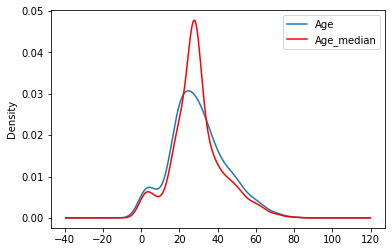

In [68]:
fig=plt.figure()
ax = fig.add_subplot(111)
df["Age"].plot(kind="kde",ax=ax)
df["Age_median"].plot(kind="kde",ax=ax,color="red")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

### Advantages And Disadvantages of Mean/Median Imputation
##### Advantages
Easy to implement(Robust to outliers)

Faster way to obtain the complete dataset 
#### Disadvantages
Change or Distortion in the original variance

Impacts Correlation

In [ ]:
####-----------------------------------------------------------------####

## Missing Values - Feature Enginnering - Day-2

#### Random sample imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing compleletly at random(MCAR)


In [76]:
## It is similar to mean/median imputation

In [1]:
df= pd.read_csv("C:\\Users\\Jayesh\\Desktop\\titanic_train.csv",usecols=["Age","Fare","Survived"])

<IPython.core.display.Javascript object>

In [78]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [79]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [6]:
## Computation of random values

df["Age"].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [7]:
df["Age"].dropna().sample()

53    29.0
Name: Age, dtype: float64

In [46]:
df["Age"].dropna().sample()

874    28.0
Name: Age, dtype: float64

In [48]:
df["Age"].dropna().sample(177)

659    58.0
178    30.0
231    29.0
706    45.0
851    74.0
       ... 
350    23.0
445     4.0
173    21.0
590    35.0
209    40.0
Name: Age, Length: 177, dtype: float64

In [53]:
df["Age"].isnull().index

RangeIndex(start=0, stop=891, step=1)

In [54]:
df[df["Age"].isnull()]

,Survived,Age,Fare
5,0,NaN,8.4583
17,1,NaN,13.0000
19,1,NaN,7.2250
26,0,NaN,7.2250
28,1,NaN,7.8792
...,...,...,...
859,0,NaN,7.2292
863,0,NaN,69.5500
868,0,NaN,9.5000
878,0,NaN,7.8958


In [63]:
## How many samples i need? probably the no. of nan values, therefore:
random= df["Age"].dropna().sample(df.Age.isnull().sum(),random_state=0)

In [64]:
random ##by using random_state=0, the values don't change everytime we run the code

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [58]:
type(random)

pandas.core.series.Series

In [ ]:
## Very nice and important logic !!

In [77]:
def impute_nan(df,variable,median):
    df[variable+'_mean']=df["Age"].fillna(median)
    df[variable+'_random']=df["Age"]
    random=df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)
    ## pandas need to have same index in order to merge the dataset
    random.index=df[df["Age"].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random

**Setting values**

Set value for all items matching the list of labels

>>> df.loc[['viper', 'sidewinder'], ['shield']] = 50
>>> df
            max_speed  shield
cobra               1       2
viper               4      50
sidewinder          7      50


In [67]:
df.loc[1]

Survived     1.0000
Age         38.0000
Fare        71.2833
Name: 1, dtype: float64

In [69]:
df.loc[df["Age"].isnull()]  ## In order to edit the data, we need to use loc function as data can only be edited through loc or iloc

,Survived,Age,Fare
5,0,NaN,8.4583
17,1,NaN,13.0000
19,1,NaN,7.2250
26,0,NaN,7.2250
28,1,NaN,7.8792
...,...,...,...
859,0,NaN,7.2292
863,0,NaN,69.5500
868,0,NaN,9.5000
878,0,NaN,7.8958


In [72]:
df[df["Age"].isnull()]  ## This is how we can display the data

,Survived,Age,Fare
5,0,NaN,8.4583
17,1,NaN,13.0000
19,1,NaN,7.2250
26,0,NaN,7.2250
28,1,NaN,7.8792
...,...,...,...
859,0,NaN,7.2292
863,0,NaN,69.5500
868,0,NaN,9.5000
878,0,NaN,7.8958


In [76]:
df[df["Age"].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [80]:
m= np.median(df["Age"])
m

<IPython.core.display.Javascript object>

nan

In [79]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [82]:
m=df["Age"].median()
m

28.0

In [83]:
impute_nan(df,"Age",m)

In [85]:
df.head()

,Survived,Age,Fare,Age_mean,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [91]:
df[df["Age"].isnull()].head() ##You can compare the median and random column

,Survived,Age,Fare,Age_mean,Age_random
5,0,NaN,8.4583,28.0,28.00
17,1,NaN,13.0000,28.0,50.00
19,1,NaN,7.2250,28.0,0.92
26,0,NaN,7.2250,28.0,36.00
28,1,NaN,7.8792,28.0,26.00


In [94]:
df["Age"].std()
df["Age_mean"].std()
df["Age_random"].std()

14.5636540895687

In [95]:
print(df["Age"].std())
print(df["Age_mean"].std())
print(df["Age_random"].std())

14.526497332334044
13.019696550973194
14.5636540895687


In [97]:
## As we can see, there is almost no distortion or change in standard deviation for random imputation as compared to median imputation
## So therefore, this dataset is perfect for random imputation.We can also check the changes by using plot function

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

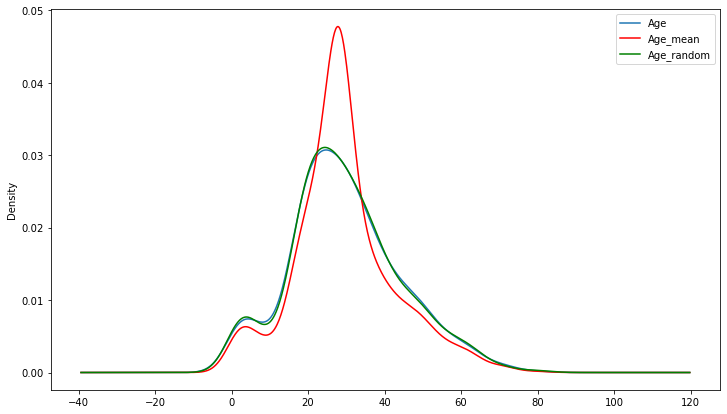

In [106]:
fig=plt.figure(figsize=(12,7))
ax=fig.add_subplot(111)
df["Age"].plot(kind="kde",ax=ax)
df["Age_mean"].plot(kind="kde",ax=ax,color="red")
df.Age_random.plot(kind="kde",ax=ax,color="green")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

In [107]:
## So as wee can see, there is almost no distortion in variance for random imputation

#### Advantages:
1. Easy to implement
 
2. There is less distortion in variance

#### Disadvantages:
1. In every situation, randomness won't work

## Capturing nan values with a new feature

##### This method works well if the data are not missing completely at random(MNAR)

In [109]:
df= pd.read_csv("C:\\Users\\Jayesh\\Desktop\\titanic_train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [110]:
## Create an additional feauture:
df["Age_nan"]=np.where(df.Age.isnull(),1,0)

<IPython.core.display.Javascript object>

In [112]:
df.head(10)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [114]:
## It captures the importance of missing values


In [115]:
df.Age.median()

28.0

In [116]:
df["Age"].fillna(df.Age.median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [117]:
df.head(10)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [118]:
df["Age"].fillna(df.Age.median(),inplace = True)
df.head(10)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [119]:
## Here in 5th index, the nan value is replaced by 28(median) and we can see in age_nan column the value corresponding to it is 1-
## - which will tell the "model" that something has happened there, it's not a normal value it's a substituted value which means it will provide some importance to the missing values

In [120]:
## Even though we have replaced nan values, it captures the importance of missing values

### Advantages 
1. Easy to implement
2. Capture the importance of missing values

### Disadvantages
1. Creating additional features(Curse of dimensionality)...if there alot of features with nan values it will create a seperate column for each feature leading to large no. of columns

In [148]:
##

## End of distribution imputation

Here we replace nan values with extreme values(outliers)

In [121]:
df= pd.read_csv("C:\\Users\\Jayesh\\Desktop\\titanic_train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [122]:
def impute(df,variable,median,extreme):
    df[variable+'_median']=df["Age"].fillna(median)
    df[variable+"_extreme"]=df["Age"].fillna(extreme)

In [124]:
m=df.Age.median()
m

28.0

In [130]:
import seaborn as sns

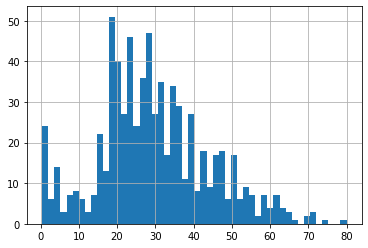

In [131]:
df.Age.hist(bins=50)

In [132]:
## End of distribution values basically means the extreme values in normal distribution(values after u + 3std)
## Here the extreme values(outliers) are around (70-80) as we can see from graph

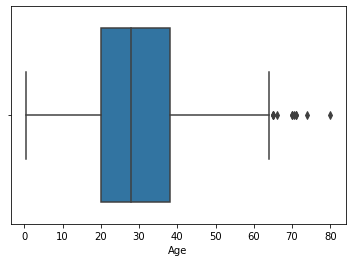

In [149]:
## We can also see the outliers(extremes) using boxplot function
sns.boxplot("Age",data=df)  ## Here again, we can see that outliers are in the range (70-80)

In [125]:
mean=df.Age.mean()
mean

29.69911764705882

In [126]:
extreme = mean + 3*(df.Age.std())
extreme

73.27860964406095

In [ ]:
## here , we haven't calculated or found the left side outliers because in our data there are no left side outliers , only right side as we can see from boxplot
## But! ofc, we can consider any of the outliers for end of distribution imputation

In [127]:
impute(df,"Age",m,extreme)

In [129]:
df.head(10)

,Survived,Age,Fare,Age_median,Age_extreme
0,0,22.0,7.2500,22.0,22.00000
1,1,38.0,71.2833,38.0,38.00000
2,1,26.0,7.9250,26.0,26.00000
3,1,35.0,53.1000,35.0,35.00000
4,0,35.0,8.0500,35.0,35.00000
5,0,NaN,8.4583,28.0,73.27861
6,0,54.0,51.8625,54.0,54.00000
7,0,2.0,21.0750,2.0,2.00000
8,1,27.0,11.1333,27.0,27.00000
9,1,14.0,30.0708,14.0,14.00000


In [134]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 24.,   6.,  14.,   3.,   7.,   8.,   6.,   3.,   7.,  22.,  13.,
         51.,  40.,  27.,  46.,  24.,  36.,  47.,  27.,  35.,  17.,  34.,
         29.,  11.,  27.,   8.,  18.,   9.,  17.,  18.,   6.,  17.,   6.,
          9.,   7.,   2.,   7.,   4.,   7.,   4.,   3.,   1.,   0.,   2.,
          3., 177.,   1.,   0.,   0.,   1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <a list of 50 Patch objects>)

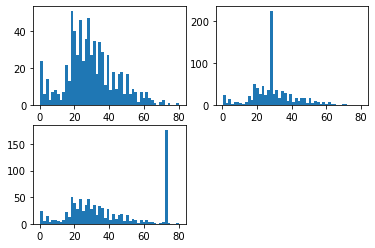

In [137]:
plt.subplot(2,2,1)
plt.hist(df["Age"],bins=50)
plt.subplot(2,2,2)
plt.hist(df["Age_median"],bins=50)
plt.subplot(2,2,3)
plt.hist(df["Age_extreme"],bins=50)

In [140]:
print(df.Age.std())
print(df.Age_median.std())
print(df.Age_extreme.std())

14.526497332334044
13.019696550973194
21.719150677136366


In [ ]:
## Now as we can see, there is a distortion in variance when it comes to median imputation and density of mean/median values has increased tremendously.
## On other hand, as we replaced nan values with extreme value, we get a huge line at the end and again there is a huge distortion of variance or std deviation.
## Now, the question arises is that, which one is better? for that draw boxplot  

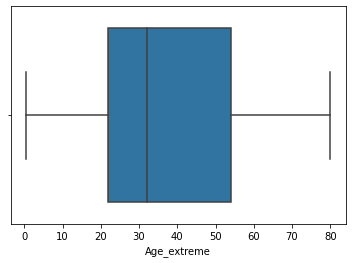

In [141]:
sns.boxplot("Age_extreme",data=df)

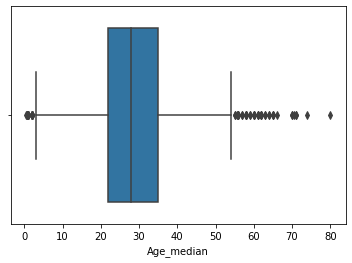

In [143]:
sns.boxplot("Age_median",data=df)

In [144]:
## Now if we compared all the three boxplots , we can easily see that, for Age_extreme there are no outliers,
## which gives us the proper distribution of age. So sometimes this scenario also works.

### Note:-  
##### In feature engineering , we need to check all the methods and then come to conclusion. Some methods may work some may not but we need to try all and show to the skateholders

##### In this case, our outliers are gone , so we can give this method a chance but again there are lot of things to consider this is just one of the methods.
##### This type of imputation is generally used to handle the outliers or reduce the impact of outliers.

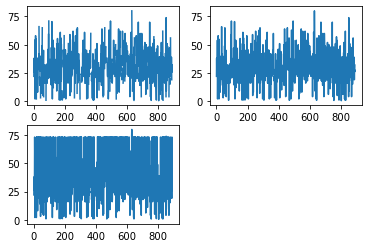

In [150]:
## Timepass: 
plt.subplot(2,2,1)
plt.plot(df["Age"])
plt.subplot(2,2,2)
plt.plot(df["Age_median"])
plt.subplot(2,2,3)
plt.plot(df["Age_extreme"])

In [ ]:
### Advantages:


### Disadvantages: